In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Text(0, 0.5, 'y dataset')

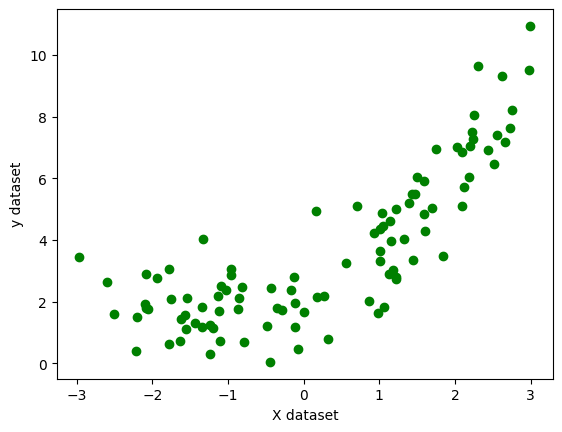

In [3]:
X= 6* np.random.rand(100, 1) - 3
y= 0.5 * X**2 + X + 2 + np.random.randn(100, 1)
plt.scatter(X,y,color='green')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
## Lets implement a simple linear regression model
from sklearn.linear_model import LinearRegression
regression_1= LinearRegression()
regression_1.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
sscore=r2_score(y_test, regression_1.predict(X_test))
print("R2 Score:", sscore)

R2 Score: 0.7399049025550395


Text(0, 0.5, 'y dataset')

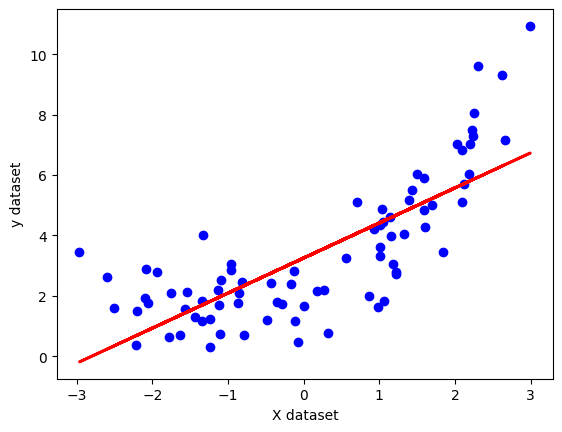

In [8]:
plt.plot(X_train,regression_1.predict(X_train), color='red', linewidth=2)
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [9]:
#Lets apply polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# The difference between transform and fit_transform is that fit_transform fits the model to the data and then transforms it, while transform only transforms the data using the already fitted model.


In [10]:
X_train_poly

array([[ 1.00000000e+00,  1.32921274e+00,  1.76680651e+00],
       [ 1.00000000e+00,  7.02605517e-01,  4.93654513e-01],
       [ 1.00000000e+00, -1.34600815e+00,  1.81173794e+00],
       [ 1.00000000e+00, -2.59836841e+00,  6.75151840e+00],
       [ 1.00000000e+00,  1.78378541e-01,  3.18189040e-02],
       [ 1.00000000e+00, -8.02807628e-02,  6.44500088e-03],
       [ 1.00000000e+00,  1.59100995e+00,  2.53131266e+00],
       [ 1.00000000e+00, -1.63426867e+00,  2.67083408e+00],
       [ 1.00000000e+00,  2.25225165e+00,  5.07263751e+00],
       [ 1.00000000e+00, -2.08450789e+00,  4.34517313e+00],
       [ 1.00000000e+00, -1.61124116e-01,  2.59609809e-02],
       [ 1.00000000e+00, -8.71179069e-01,  7.58952970e-01],
       [ 1.00000000e+00,  9.35262972e-04,  8.74716827e-07],
       [ 1.00000000e+00, -4.83856947e-01,  2.34117545e-01],
       [ 1.00000000e+00,  5.62571718e-01,  3.16486938e-01],
       [ 1.00000000e+00, -2.05255734e+00,  4.21299164e+00],
       [ 1.00000000e+00,  1.18528517e+00

In [11]:
X_test_poly

array([[ 1.        ,  1.22260073,  1.49475254],
       [ 1.        , -1.20191058,  1.44458904],
       [ 1.        , -1.55196745,  2.40860298],
       [ 1.        ,  1.74752985,  3.05386058],
       [ 1.        , -2.08241877,  4.33646791],
       [ 1.        ,  2.97250844,  8.83580643],
       [ 1.        , -0.44059305,  0.19412223],
       [ 1.        , -0.11424228,  0.0130513 ],
       [ 1.        ,  2.75690723,  7.60053745],
       [ 1.        ,  2.51059378,  6.30308114],
       [ 1.        ,  2.72706153,  7.43686461],
       [ 1.        , -1.02663139,  1.05397201],
       [ 1.        , -1.78687533,  3.19292344],
       [ 1.        ,  0.16430103,  0.02699483],
       [ 1.        ,  2.55098927,  6.50754624],
       [ 1.        , -1.61555794,  2.61002747],
       [ 1.        ,  2.44068427,  5.95693973],
       [ 1.        ,  1.12803863,  1.27247114],
       [ 1.        ,  1.47413202,  2.1730652 ],
       [ 1.        ,  1.45122476,  2.10605329]])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
regression=LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
sscore=r2_score(y_test, y_pred)
print("R2 Score for Polynomial Regression:", sscore)

R2 Score for Polynomial Regression: 0.8359976613954913


In [13]:
print(regression.coef_)

[[0.         1.08339098 0.51367901]]


In [14]:
print(regression.intercept_)

[2.03225071]


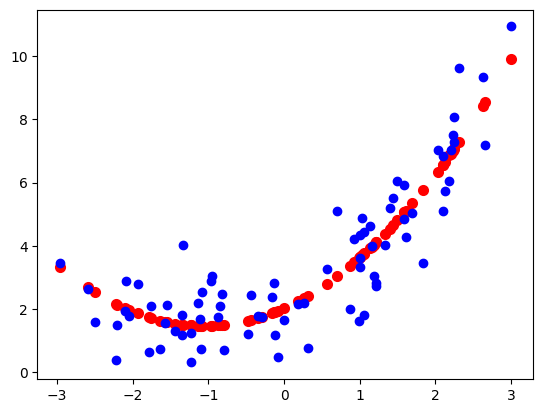

In [16]:
plt.scatter(X_train,regression.predict(X_train_poly), color='red', linewidth=2)
plt.scatter(X_train, y_train, color='blue')

## If we make the degree value higher, the model will fit the data better, but it may also lead to overfitting.
## To avoid overfitting, we can use techniques like cross-validation or regularization.
## So overfitting is basically when the model fits the training data too well, but does not generalize well to new data.
## It does not generalize well to new data because it has learned the noise in the training data instead of the underlying pattern.
## So we can use cross-validation to check if the model is overfitting or not.
## So we must always check the model performance on the test data to see if it is overfitting or not.

In [27]:
# Pipelining Concepts
from sklearn.pipeline import Pipeline

def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()

    poly_regression = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])

    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    # plotting prediction line
    plt.plot(X_new, y_pred_new, label=f'Degree {degree}', linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X dataset')
    plt.ylabel('y dataset')
    plt.axis([-4, 4, 0, 10])
    plt.show()


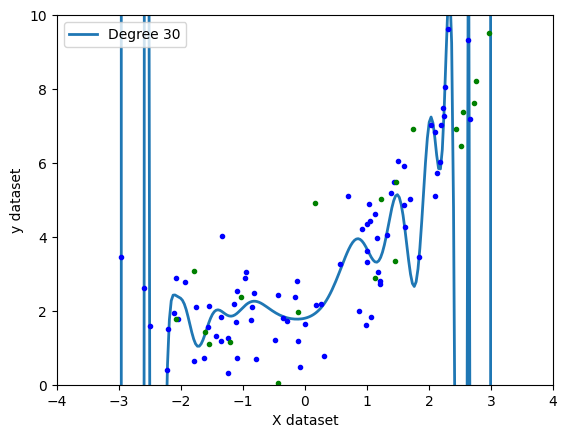

: 

In [ ]:
poly_regression(30)